# Classifying Hand-written Numbers

For this project, we'll build a neural network for image classification that is able to classify hand-written digits. We will perform this classification using deep, feedforward neural networks.

### The difficulties of Image Classification

Broadly speaking, image classification, particularly or handwritten text, is a difficult task within the field of machine learning and pattern recognition.

This is owed to a multitude of reasons, some of which are the following:

1. Each image in a training set is high dimensional, because each pixel in an image is its own featue, and a separate column. For instance, a 144 x 144 image has 20736 features. 
2. Images are often downsampled to lower resolutions, and transformed to grayscale. For instance, an 8 megapixel photo with 3264 x 2448 pixels (for a total of about 7,990,000 features) is scaled down to between 128 and 512 pixels for faster processing, which results in loss of detail available for training and pattern matching. 
3. The features inside an image don't have any clear linear or nonlinear relationship that might be learned using a model like linear or logistic regression. In grayscale, each pixel is simply represeted as a brightness value ranging from 0 to 256. 

### The use of deep learning in image classification

Deep learning tends to be effective in image classification because of the fact that its models can learn hierarchical representations.

An effective deep learning model learns intermediate representations at each layer in the model, and then uses them in the prediction process. Each successive layer uses weights from previous layers to try and learn more complex representations. 

### The dataset

The scikit-learn library contains several datasets pre-loaded within the library, within the namespace of `sklearn.datasets`.

The `load_digits()` function returns a copy of the [hand-written digits](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) dataset from UCI.

Each image is represented as a row of pixel values, since dataframes are a tabular representation of data. 

Visualizating an image from the dataframe therefore requires that we reshape the image back to irs original 28 x 28 pixel dimensions, and then plot them on a coordinate grid using the `pyplot.imshow()` function. 

## Introduction

We'll start by importing the necessary libraries, and then reshaping and visualizing the dataframe:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

The labels for what the image actually should be are stored in the `target` key. Those representing the image are stored in the `data` key.

In [3]:
# Converting target values into series

labels = pd.Series(digits['target'])

# Converting images to dataframe

digits_images = pd.DataFrame(digits['data'])

In [4]:
digits_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


Each row represents an image. 

We'll isolate just the first row, and then reshape it to visualize the first image. 

In [5]:
first_digit = digits_images.iloc[0]
np_image = first_digit.values
np_image = np_image.reshape(8,8)

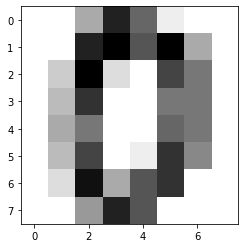

In [6]:
# Visualizing the image:

plt.imshow(np_image, cmap='gray_r')

We'll generate a scatter plot grid with 2 rows and 4 columns to visualize more images.

The first row will have images corresponding to rows 0, 100, 200, 300.
The second row will have images corresponding to rows 1000,1100, 1200, 1300.

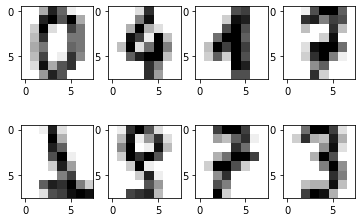

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 4, 1)
ax2 = fig.add_subplot(2, 4, 2)
ax3 = fig.add_subplot(2, 4, 3)
ax4 = fig.add_subplot(2, 4, 4)
ax5 = fig.add_subplot(2, 4, 5)
ax6 = fig.add_subplot(2, 4, 6)
ax7 = fig.add_subplot(2, 4, 7)
ax8 = fig.add_subplot(2, 4, 8)

ax1.imshow(np_image, cmap='gray_r')
ax2.imshow(digits_images.iloc[100].values.reshape(8,8), cmap='gray_r')
ax3.imshow(digits_images.iloc[200].values.reshape(8,8), cmap='gray_r')
ax4.imshow(digits_images.iloc[300].values.reshape(8,8), cmap='gray_r')
ax5.imshow(digits_images.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax6.imshow(digits_images.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax7.imshow(digits_images.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax8.imshow(digits_images.iloc[1300].values.reshape(8,8), cmap='gray_r')

## Using K-Nearest Neighbours algorithm

Unlike the linear and logistic regression models, the K-nearest neighbours algorithm makes no assumption about linearity between features and the output labels. This allows it to capture nonlinearity in the data. 

In fact, it doesn't have a specific model representation (which is why it's referred to as an algorithm, and not a model). 

The K-nearest neighbour algorithm compares every unseen observation in the test set to all (or most) training observations to look for similar (i.e. nearest) observations, and then it finds the label with the most nearby observations and assigns that as the prediction for the unseen observation. 

We'll therefore first attempt the digit classification using the k-nearest neighbours algorithm.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

A pipeline of functions for testing and training the k-nearest neighbour algorithm will be set-up. We'll make the following functions:

- `knn_train()` This function will use the `KNeighborsClassifier` to train our k-nearest neighbours model.
- `knn_test()` This function will test the model.
- `knn_cross_validate()` This funcion will perform 4-fold cross validation using the above two `train()` and `test()` functions.

In [9]:
def knn_train(n, train_features, train_labels):
    """
    Trains the model. Receives the train_X, train_y, and no. of nearest neighbors
    """
    knn = KNeighborsClassifier(n_neighbors= n)
    knn.fit(train_features, train_labels)
    return knn # Returns the model
    

def knn_test(knn_model, test_features, test_labels):
    """
    Tests the model. Receives the moel returned from the above function, as well as test_X and test_y values.
    """
    predictions = knn_model.predict(test_features)
    
    # Setting up dataframe to calculate accuracy
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    
    # accuracy is number of correct predictions over total predictions
    accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)
    return accuracy


def knn_cross_validate(k):
    """
    Function takes in "k", which is used to specify number of nearest neighbors
    when the knn_train function is called.
    """
    accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(digits_images):
        train_features, test_features = digits_images.loc[train_index], digits_images.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # Call knn_train() function now to train the model
        model = knn_train(k, train_features, train_labels)
        
        # Call knn_test() function to return the accuracy
        accuracy_value = knn_test(model, test_features, test_labels)
        accuracies.append(accuracy_value)
    return accuracies

First, we'll test the accuracy for the above model for `n_neighbors` = 1

In [10]:
one_nearest_neighbor_accuracies = knn_cross_validate(1)

print(one_nearest_neighbor_accuracies)

[0.9688888888888889, 0.9599109131403119, 0.9799554565701559, 0.9621380846325167]


In [11]:
# Computing the mean of the above list:
print(np.mean(one_nearest_neighbor_accuracies))

0.9677233358079684


With k = 1 (i.e. 1-nearest neighbor), the knn model has a 96.8% accuracy. 

Let's experiment with different values for k, and plot the resulting accuracies. 

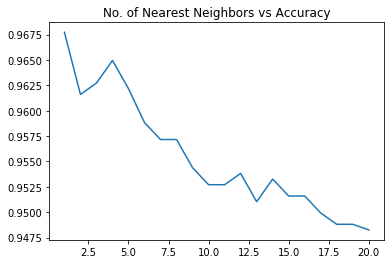

In [12]:
# Using List Comprehension to generate x and y axis values

k_values = [x for x in range(1,21)]
accuracy_values = [np.mean(knn_cross_validate(x)) for x in k_values]

plt.plot(k_values, accuracy_values)
plt.title("No. of Nearest Neighbors vs Accuracy")
plt.show()

We note that k values from 1 to 5 maintain simple accuracies above 96%, with the largest accuracy of around 96.8% being observed when k = 1. 

Past that point, the accuracy seems to decrease, although even at k = 20, the accuracy still seems to be nearly 95%.

While the accuracy doesn't seem too bad, we note that there were some downsides to using the k-nearest neighbour algorithm:

1. There isn't a model representation we can debug and explore.
2. The memory usage is fairly high. For every new unseen observation, several comparisons have to be made to the seen observations.

We'll now instead try a neural network, with at first one hidden layer.

## Neural Network - 1 Hidden Layer

We'll use slightly modified versions of the above 3 functions. 

In [13]:
from sklearn.neural_network import MLPClassifier

def nn_train(neuron_arch, train_features, train_labels):
    """
    Trains the model. Receives the train_X, train_y, and no. of nearest neighbors
    """
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp # Returns the model
    

def nn_test(knn_model, test_features, test_labels):
    """
    Tests the model. Receives the moel returned from the above function, as well as test_X and test_y values.
    """
    predictions = knn_model.predict(test_features)
    
    # Setting up dataframe to calculate accuracy
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    
    # accuracy is number of correct predictions over total predictions
    accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)
    return accuracy


def nn_cross_validate(neuron_arch):
    """
    Function takes in "k", which is used to specify number of nearest neighbors
    when the knn_train function is called.
    """
    accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(digits_images):
        train_features, test_features = digits_images.loc[train_index], digits_images.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # Call knn_train() function now to train the model
        model = nn_train(neuron_arch, train_features, train_labels)
        
        # Call knn_test() function to return the accuracy
        accuracy_value = nn_test(model, test_features, test_labels)
        accuracies.append(accuracy_value)
    return accuracies

The above `nn_cross_validation` function will be tested using the following neuron_arch tuple values:

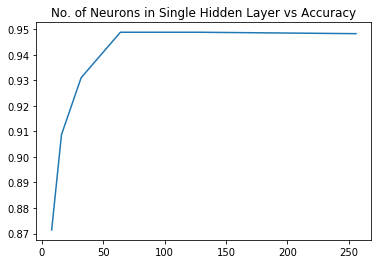

In [15]:
import warnings
warnings.filterwarnings("ignore")

nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

no_of_neurons = [x[0] for x in nn_one_neurons]
accuracy_scores = [np.mean(nn_cross_validate(x)) for x in nn_one_neurons]

plt.plot(no_of_neurons, accuracy_scores)
plt.title("No. of Neurons in Single Hidden Layer vs Accuracy")
plt.show()

Adding more neurons to the single hidden layer model significantly improved the model's accuracy, from about 87% to nearly 95%. One thing to note is that we are simply measuring the accuracy, and so the results above don't tell us anything about the false/true positive prediction rate, and false/true negative prediction rate. 

Seeing as the K-Nearest Neighbors Model achieved a 96% accuracy, so far it doesn't look like there are any advantages to using a Neural Network with a single Hidden Layer.

In light of that, we'll now try using a Neural Network with 2 hidden layers.

## Neural Network - 2 Hidden Layers

Using the same functions above, we'll pass in tuples that represent neurons in 2 hidden layers for the `neuron_arch` parameter in the `nn_cross_validate` function.

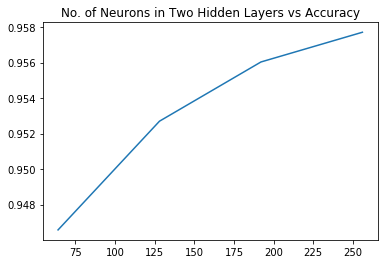

In [16]:
nn_two_layers = [
    (64,64),
    (128,128),
    (192,192),
    (256,256)
]

no_of_neurons = [x[0] for x in nn_two_layers]
accuracy_scores = [np.mean(nn_cross_validate(x)) for x in nn_two_layers]

plt.plot(no_of_neurons, accuracy_scores)
plt.title("No. of Neurons in Two Hidden Layers vs Accuracy")
plt.show()

In [17]:
print(accuracy_scores)

[0.9465751051719873, 0.952698589458055, 0.956033160108884, 0.9577072506805246]


We see that there is a slight improvement when using Two Hidden Layers. With 256 neurons, the simple accuracy is around 95.8%. The fact that the 4-fold cross validation method is being used provides more certainty that the model is doing a better job generalizing, and not overfitting.

Next, we'll try a Neural Network with 3 hidden layers. 

## Neural Network - 3 Hidden Layers

One caveat we should keep in mind here is that using more hidden layers tends to increase the amount of over-fitting that happens. As a way around this, we'll also increase the number of folds we use in k-fold cross validation to 6.

For visibility, we'll write below the functions used earlier. Only the `nn_cross_validate` function needs to be modified.

In [25]:
def nn_train(neuron_arch, train_features, train_labels):
    """
    Trains the model. Receives the train_X, train_y, and no. of nearest neighbors
    """
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp # Returns the model
    

def nn_test(knn_model, test_features, test_labels):
    """
    Tests the model. Receives the moel returned from the above function, as well as test_X and test_y values.
    """
    predictions = knn_model.predict(test_features)
    
    # Setting up dataframe to calculate accuracy
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    
    # accuracy is number of correct predictions over total predictions
    accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)
    return accuracy


def nn_cross_validate(neuron_arch):
    """
    Function takes in "k", which is used to specify number of nearest neighbors
    when the knn_train function is called.
    """
    accuracies = []
    kf = KFold(n_splits=6, random_state=2) # Only thing being changed is setting n_splits to 6.
    for train_index, test_index in kf.split(digits_images):
        train_features, test_features = digits_images.loc[train_index], digits_images.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        # Call knn_train() function now to train the model
        model = nn_train(neuron_arch, train_features, train_labels)
        
        # Call knn_test() function to return the accuracy
        accuracy_value = nn_test(model, test_features, test_labels)
        accuracies.append(accuracy_value)
    return accuracies

We'll be passing in tuples that represent neurons in 3 hidden layers.

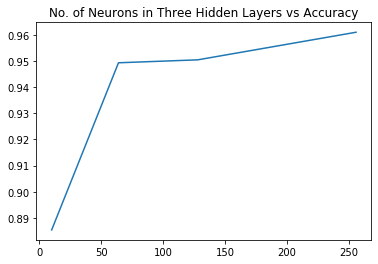

In [26]:
nn_three_layers = [
    (10,10,10),
    (64,64,64),
    (128,128,128),
    (256,256,256)
]

no_of_neurons = [x[0] for x in nn_three_layers]
accuracy_scores = [np.mean(nn_cross_validate(x)) for x in nn_three_layers]

plt.plot(no_of_neurons, accuracy_scores)
plt.title("No. of Neurons in Three Hidden Layers vs Accuracy")
plt.show()

In [27]:
print(accuracy_scores)

[0.8853734671125975, 0.9493571163136382, 0.950479375696767, 0.9610460795243404]


We note that increasing the number of hidden layers further increased the accuracy, this time to just over 96.1%, even though we were using 6-fold cross validation.

This observation is very cohesive with research literature about using deep neural networks for computer "vision", such as the digits classification we attempted here. Adding more layers and neurons corresponded to an increase in the performance of the deep neural networks in classifying the numbers.